This notebook revises what I've learned from the book ["Geek Guide - Machine Learning with Python"](https://www.linuxjournal.com/node/1340325). It uses the Iris dataset available in scikit-learn and splits that dataset into train data and test data. The model it uses will be knn where k = 3.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

In [2]:
iris = load_iris()

X = iris.data
y = iris.target

# X will have the features of the dataset; y will have the labels of the dataset
print(X.shape)
print(y.shape)

(150, 4)
(150,)


Lets now try to visualize the data we have obtained

In [3]:
# Trying to plot the petals
#plt.imshow(X[:, -2:] + 10)
iris_dataframe = pd.DataFrame(iris.data, columns=[iris.feature_names])

In [4]:
iris_dataframe.head()

sepal length (cm) sepal width (cm) petal length (cm) petal width (cm)
0               5.1              3.5               1.4              0.2
1               4.9              3.0               1.4              0.2
2               4.7              3.2               1.3              0.2
3               4.6              3.1               1.5              0.2
4               5.0              3.6               1.4              0.2

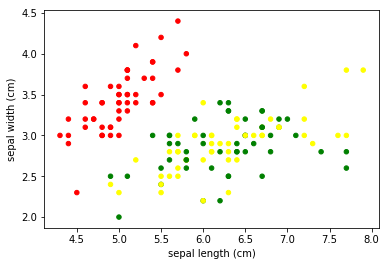

In [5]:
colors = []
for c in y:
    colors.append('red') if c == 0 else colors.append('green')
    colors.append('yellow') if c == 1 else None
    
iris_dataframe.plot(kind="scatter", x="sepal length (cm)", y="sepal width (cm)", c=colors)

Let's now do a demo train and prediction on the dataset

In [7]:
# Train, or 'fit', the dataset

# In order to do that, we need to 1) Make an instance of our model class
knn3 = KNeighborsClassifier(n_neighbors=3)

# 2) Train the model with the dataset
knn3.fit(X, y)

# 3) Now, lets run a prediction
sample_test_data = [[3, 3, 1, 5]]
prediction = knn3.predict(sample_test_data)
print(prediction)

# To get the actural name of our prediction
print("The actual name of the flower you predicted is {} !".format(iris.target_names[prediction]))

[0]
The actual name of the flower you predicted is ['setosa'] !


But, this approach yields a problem... We don't have enough test data. To solve this, we can split a part of our training data into training and test data. This also gives us the opportunity to test with data that is not in out train sample. Something like in a real world situation. Let's do that now.

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8)

knn2 = KNeighborsClassifier(n_neighbors=2)
knn3 = KNeighborsClassifier(n_neighbors=3)
knn5 = KNeighborsClassifier(n_neighbors=5)

knn2.fit(X_train, y_train)
knn3.fit(X_train, y_train)
knn5.fit(X_train, y_train)

knn2_predictions = knn2.predict(X_test)
knn3_predictions = knn3.predict(X_test)
knn5_predictions = knn5.predict(X_test)

Now that we have our predictions, lets check their accuracy!

In [40]:
from sklearn import metrics

print("Accuracy score of knn2: {}%".format(metrics.accuracy_score(y_test, knn2_predictions) * 100))
print("Accuracy score of knn3: {}%".format(metrics.accuracy_score(y_test, knn3_predictions) * 100))
print("Accuracy score of knn5: {}%".format(metrics.accuracy_score(y_test, knn5_predictions) * 100))

Accuracy score of knn2: 89.16666666666667%
Accuracy score of knn3: 90.83333333333333%
Accuracy score of knn5: 90.0%


In [44]:
# Plotting a graph of test split size vs. their accuracy (in percent)
acc_knn2, acc_knn3, acc_knn5 = [], [], []

for test_size in range(1, 10):
    
    # range() does not support floating point numbers so dividing by 10
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size/10)

    knn2 = KNeighborsClassifier(n_neighbors=2)
    knn3 = KNeighborsClassifier(n_neighbors=3)
    knn5 = KNeighborsClassifier(n_neighbors=5)

    knn2.fit(X_train, y_train)
    knn3.fit(X_train, y_train)
    knn5.fit(X_train, y_train)

    knn2_predictions = knn2.predict(X_test)
    knn3_predictions = knn3.predict(X_test)
    knn5_predictions = knn5.predict(X_test)
    
    acc_knn2.append(metrics.accuracy_score(y_test, knn2_predictions) * 100)
    acc_knn3.append(metrics.accuracy_score(y_test, knn3_predictions) * 100)
    acc_knn5.append(metrics.accuracy_score(y_test, knn5_predictions) * 100)

Text(0,0.5,'Accuracy in %')

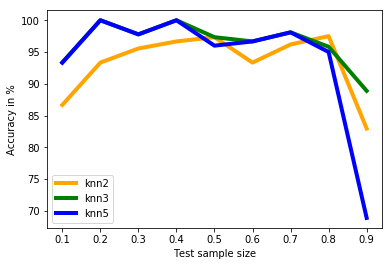

In [73]:
plt.plot([x / 10 for x in range(1, 10)], acc_knn2, color="orange", linewidth=4)
plt.plot([x / 10 for x in range(1, 10)], acc_knn3, color="green", linewidth=4)
plt.plot([x / 10 for x in range(1, 10)], acc_knn5, color="blue", linewidth=4)
plt.legend(["knn2", "knn3", "knn5"])
plt.xlabel("Test sample size")
plt.ylabel("Accuracy in %")